<a href="https://colab.research.google.com/github/Ambrgna/CS-5530-Assignment-1/blob/main/students_performance/src/students_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read Raw Data (Ingestion Stage)

In [90]:
url = 'https://raw.githubusercontent.com/Ambrgna/CS-5530-Assignment-1/refs/heads/main/students_performance/data_raw/raw_students_performance_data.csv'
df = pd.read_csv(url)
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Preprocessing Stage

In [91]:
non_numeric_cols = df.select_dtypes(exclude=np.number)

for col in non_numeric_cols.columns:
    print(f"{col}:")
    for val in non_numeric_cols[col].unique():
        print(f"  - {val}")
    print()

gender:
  - female
  - male

race/ethnicity:
  - group B
  - group C
  - group A
  - group D
  - group E

parental level of education:
  - bachelor's degree
  - some college
  - master's degree
  - associate's degree
  - high school
  - some high school

lunch:
  - standard
  - free/reduced

test preparation course:
  - none
  - completed



In [134]:
df_clean = pd.get_dummies(
    df.assign(
      gender=df["gender"].map({"male": 1, "female": 0}).astype('int8'),
      lunch=df["lunch"].map({"standard": 1, "free/reduced": 0}).astype('int8'),
      test_preparation_course=df["test preparation course"].map({"completed": 1, "none": 0}).astype('int8')
    ),
    columns=["parental level of education", "race/ethnicity"],
    prefix=["parental level of education", "race/ethnicity"],
    dtype='int8'
    )
df_clean.to_csv("clean_students_performance_data.csv", index=False)
df_clean


,gender,lunch,test preparation course,math score,reading score,writing score,test_preparation_course,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,0,1,none,72,72,74,0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,completed,69,90,88,1,0,0,0,0,1,0,0,0,1,0,0
2,0,1,none,90,95,93,0,0,0,0,1,0,0,0,1,0,0,0
3,1,0,none,47,57,44,0,1,0,0,0,0,0,1,0,0,0,0
4,1,1,none,76,78,75,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,completed,88,99,95,1,0,0,0,1,0,0,0,0,0,0,1
996,1,0,none,62,55,55,0,0,0,1,0,0,0,0,0,1,0,0
997,0,0,completed,59,71,65,1,0,0,1,0,0,0,0,0,1,0,0
998,0,1,completed,68,78,77,1,0,0,0,0,1,0,0,0,0,1,0


Gender boxplots (math vs reading)

Question: Are there gender differences in math vs reading?


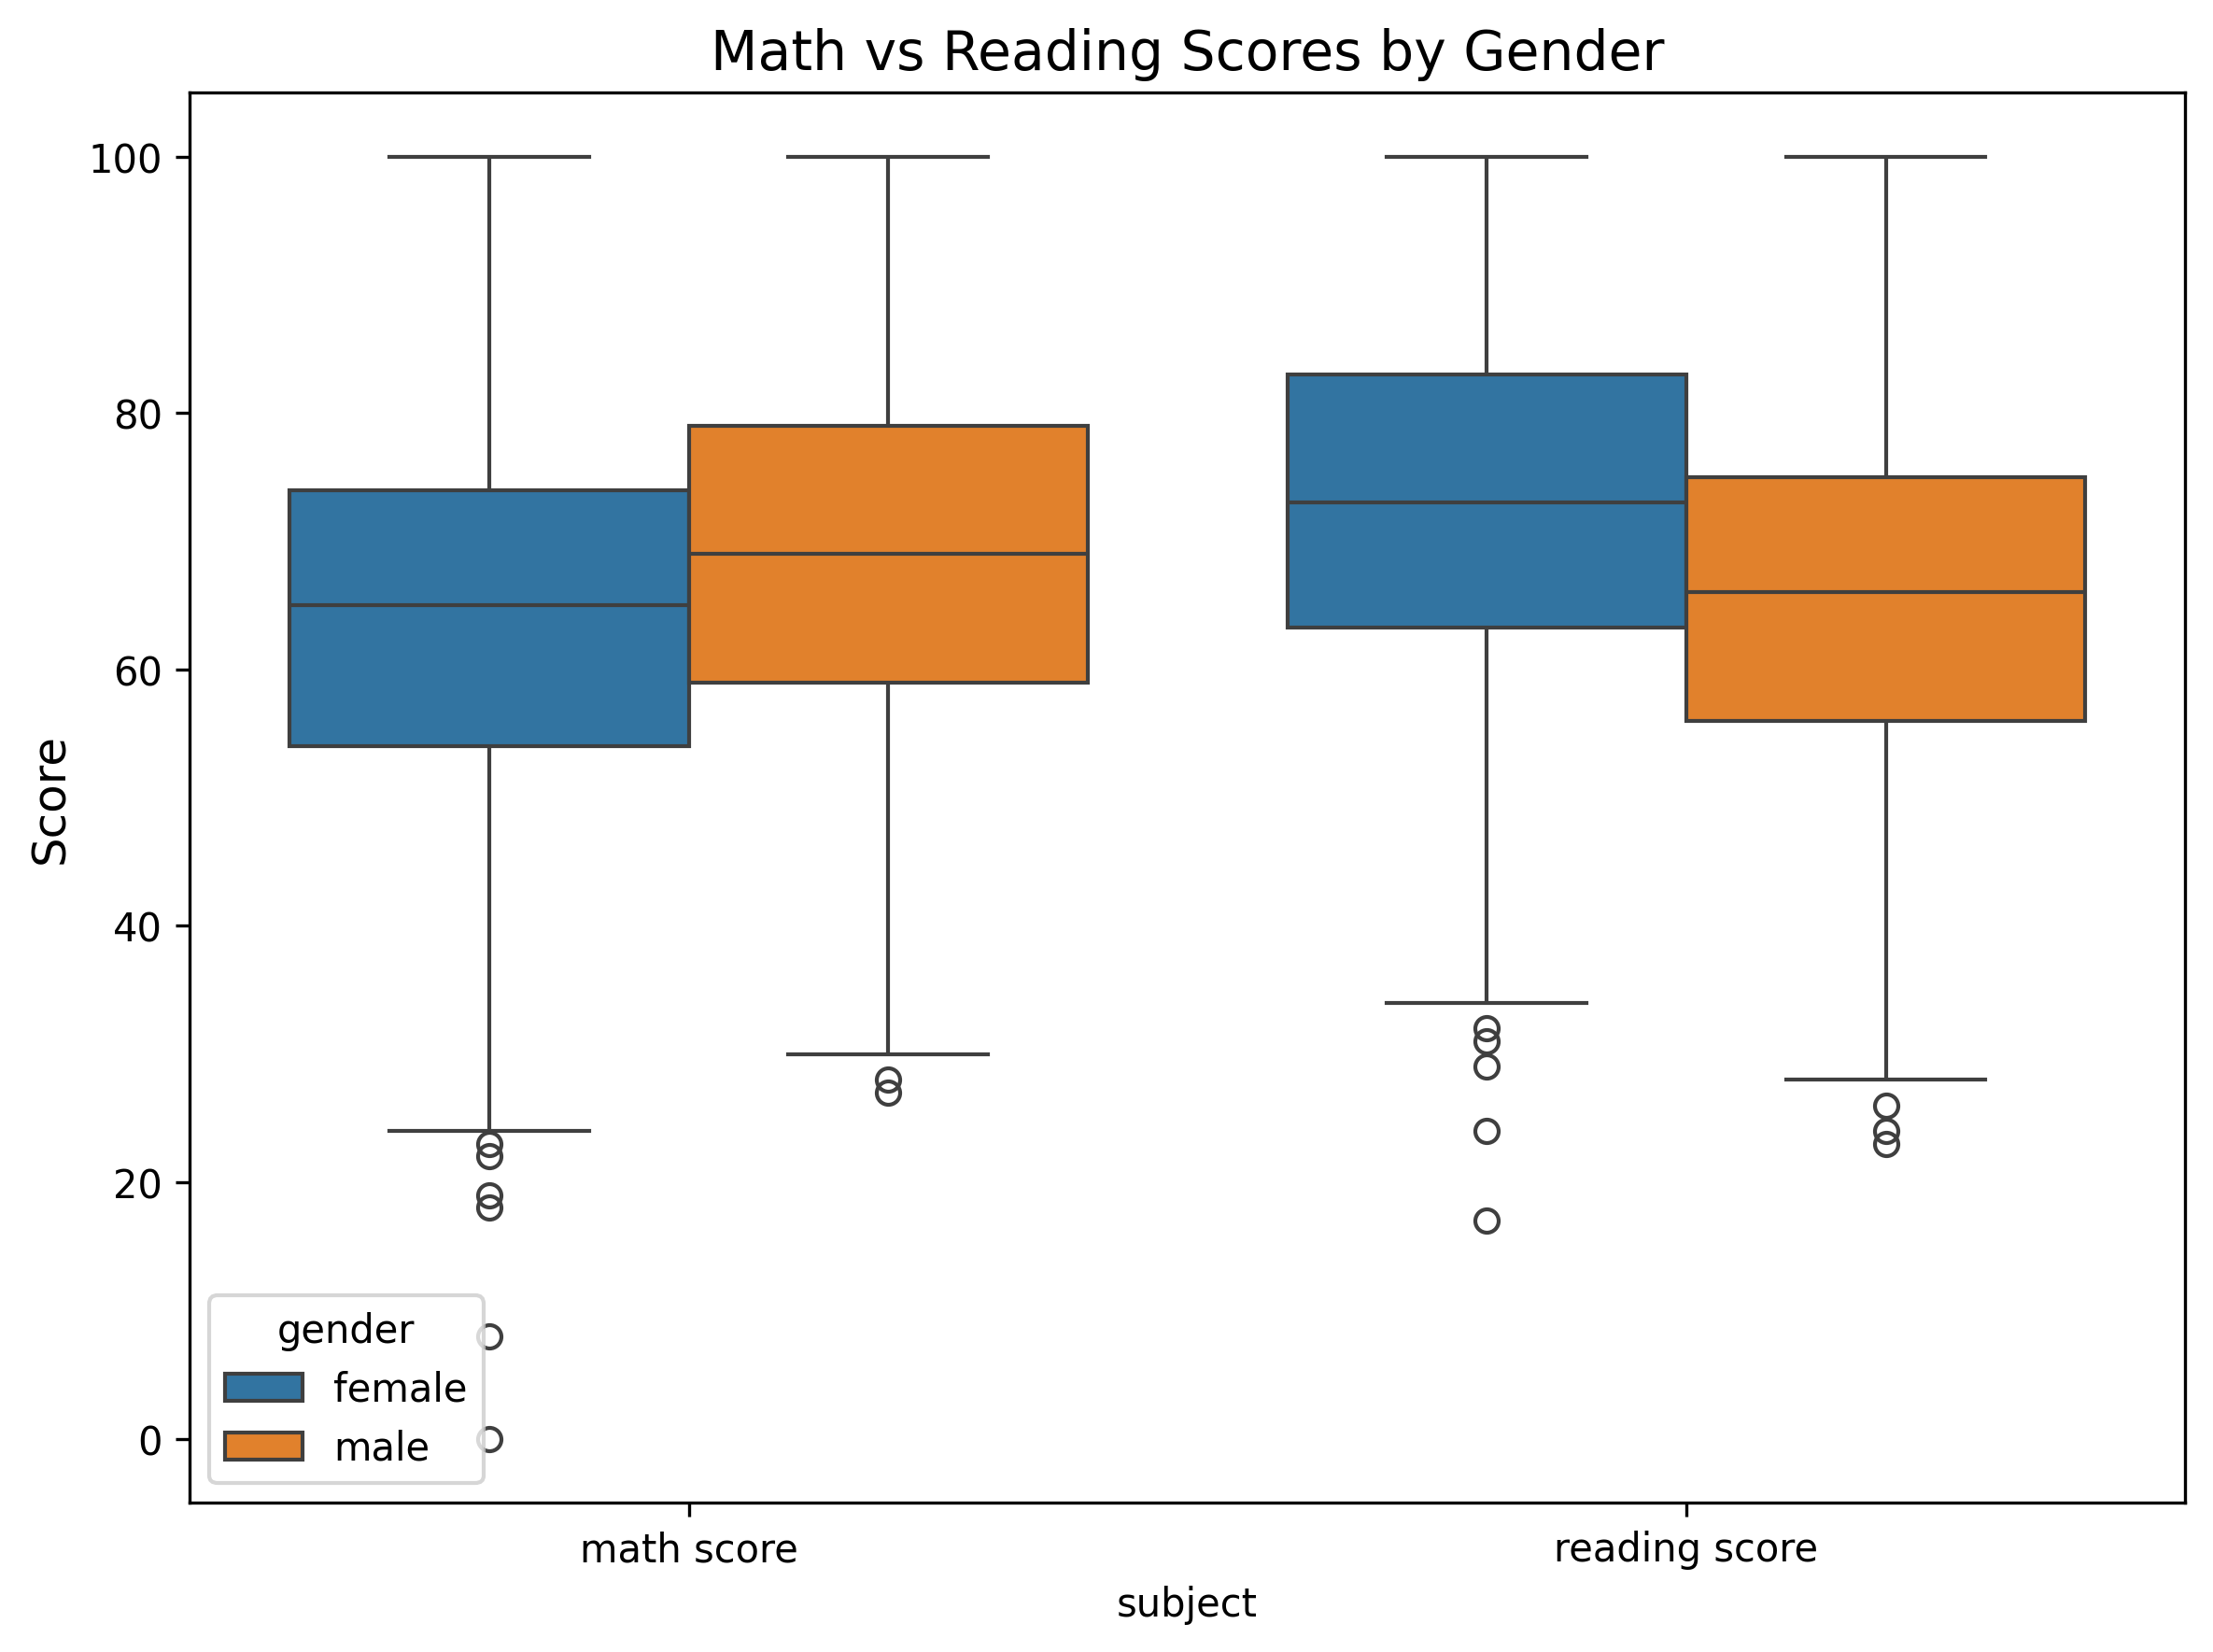

In [113]:
df_melted = df_clean.melt(id_vars="gender", value_vars=["math score", "reading score"],
                    var_name="subject", value_name="score")


df_melted["gender"] = df_melted["gender"].map({1: "male", 0: "female"})

plt.figure(figsize=(8, 6), dpi=300)

sns.boxplot(x="subject", y="score", hue="gender", data=df_melted)

plt.title("Math vs Reading Scores by Gender", fontsize=14)
plt.ylabel("Score", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.show()



5–8 sentence interpretation to reports

Test prep impact on math

Question: Do students who completed test prep score higher in math

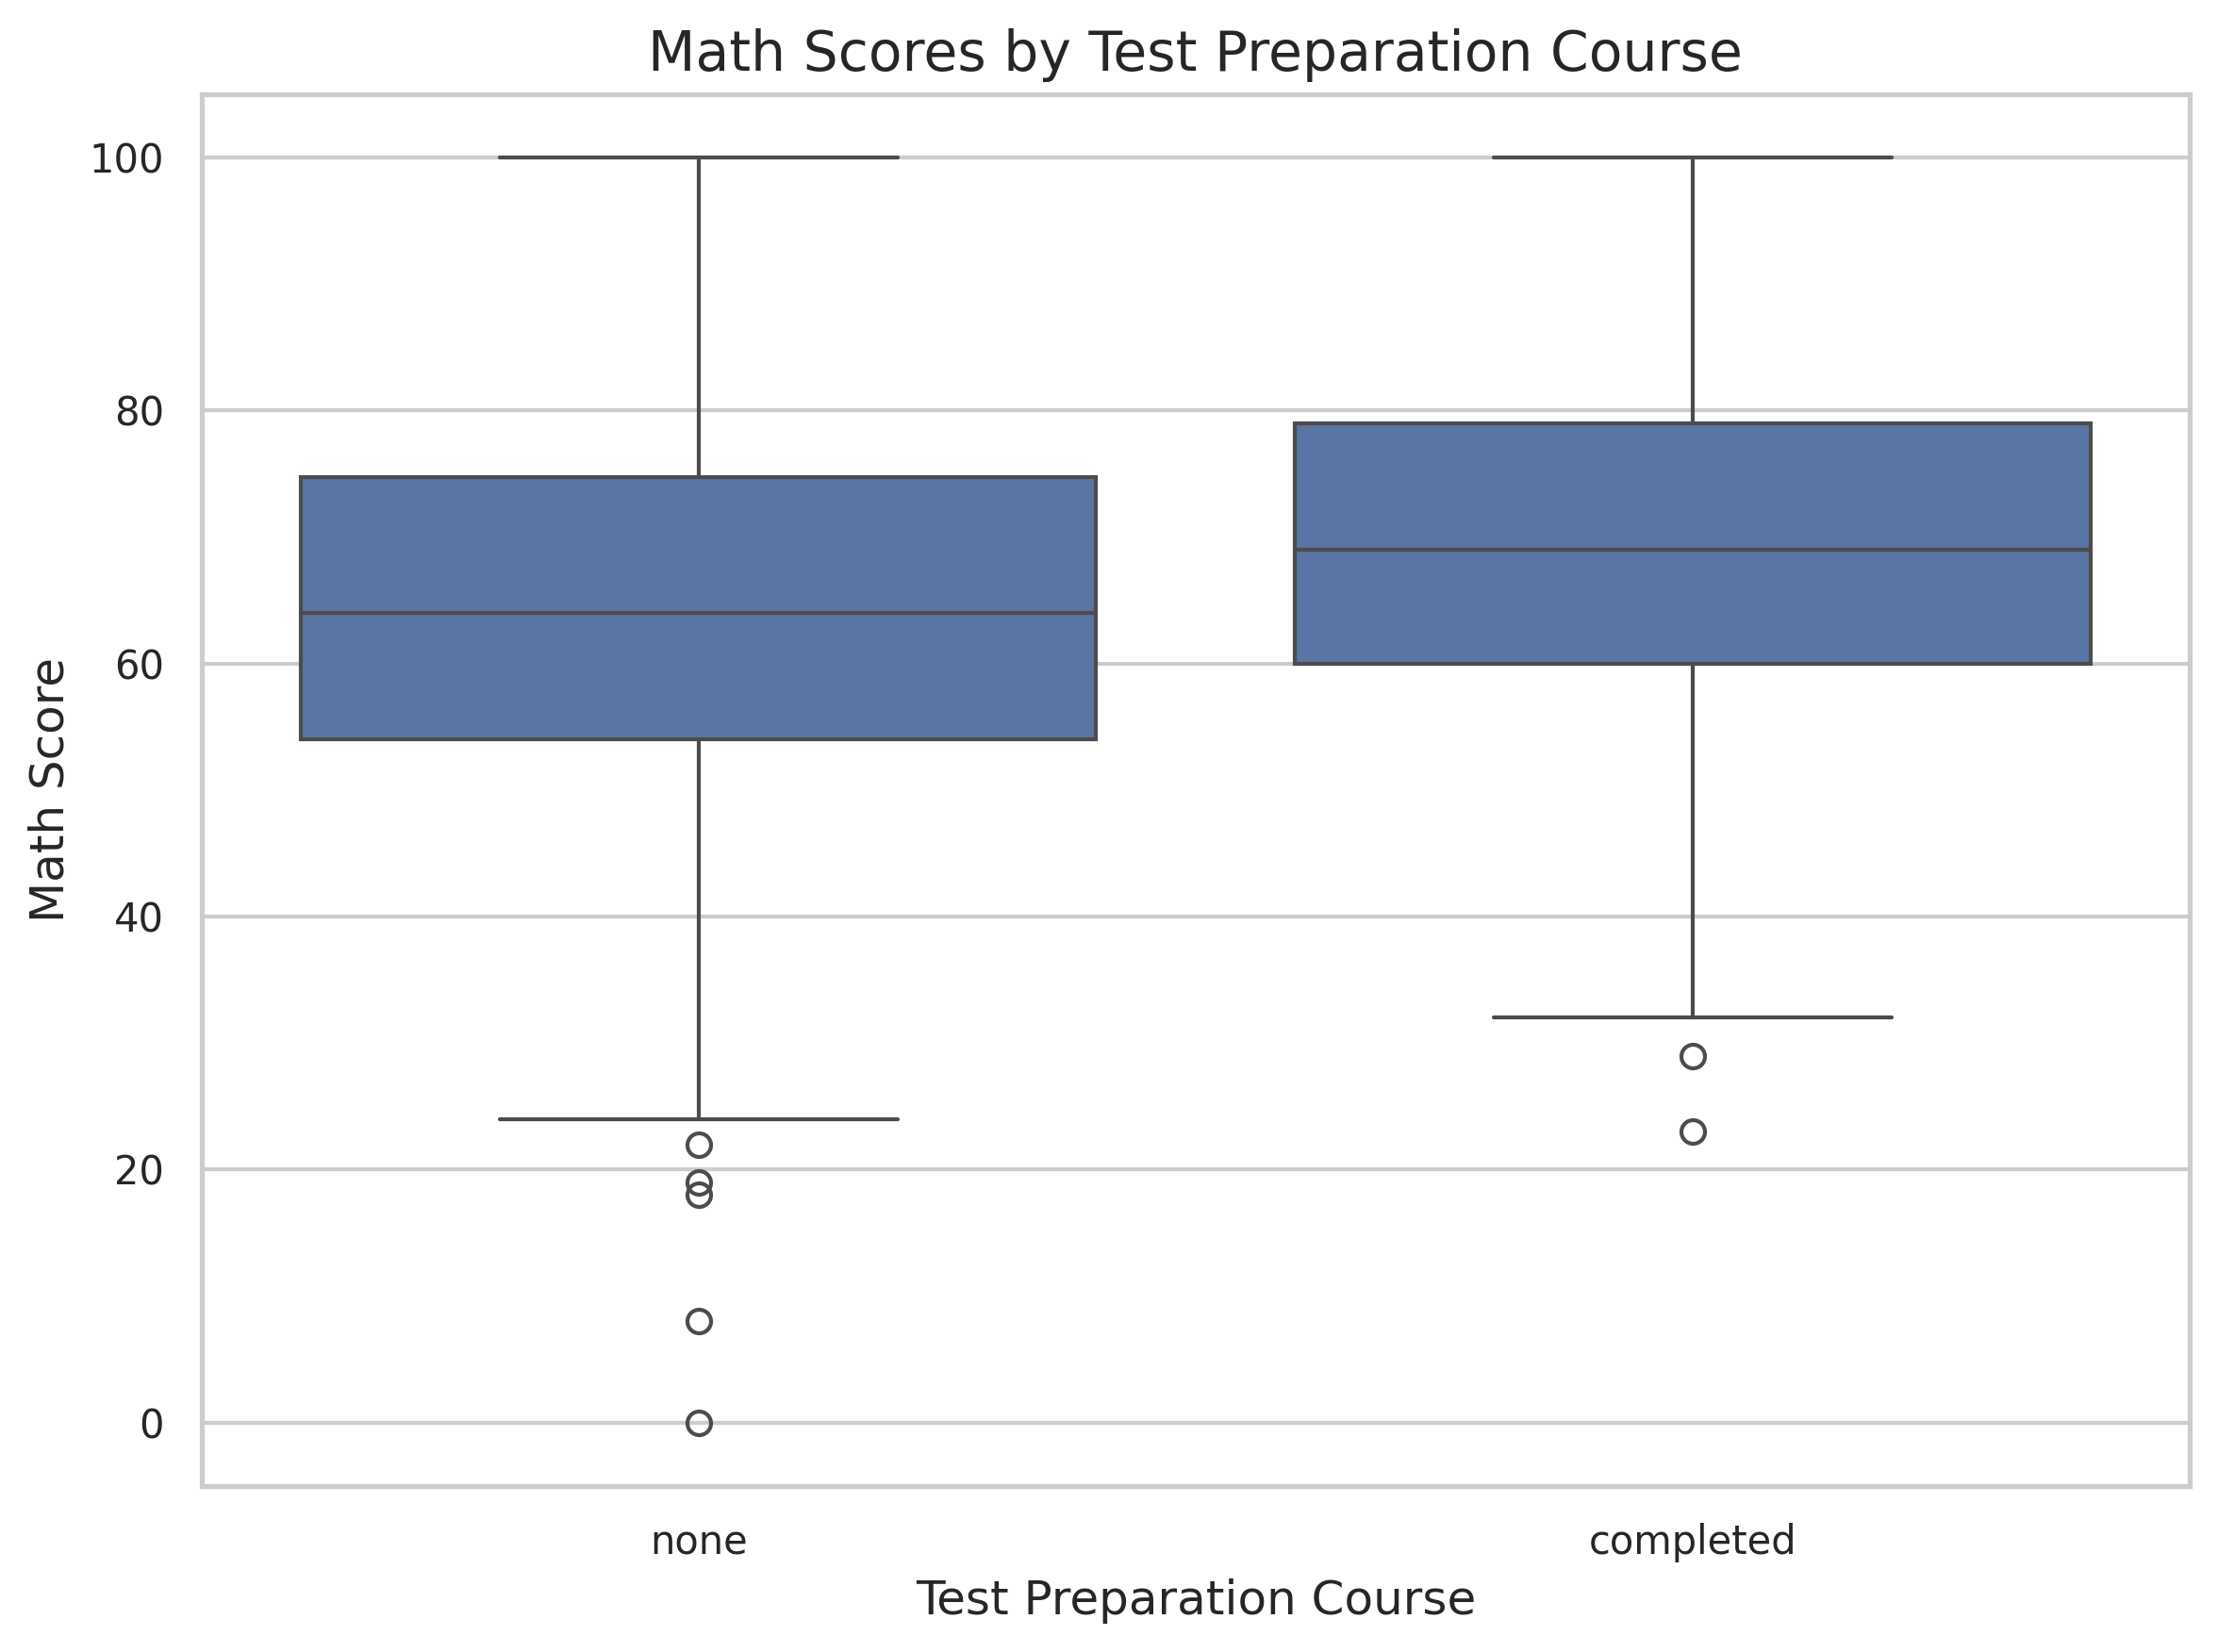

In [132]:
plt.figure(figsize=(8, 6), dpi=300)

sns.boxplot(
    x=df_clean["test_preparation_course"].map({1: "completed", 0: "none"}),  # map on the fly
    y=df_clean["math score"]
)

plt.title("Math Scores by Test Preparation Course", fontsize=14)
plt.xlabel("Test Preparation Course", fontsize=12)
plt.ylabel("Math Score", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


5–8 sentence interpretation to reports

Lunch type and average performance

Question: Does lunch type (standard vs free/reduced) relate to outcomes?

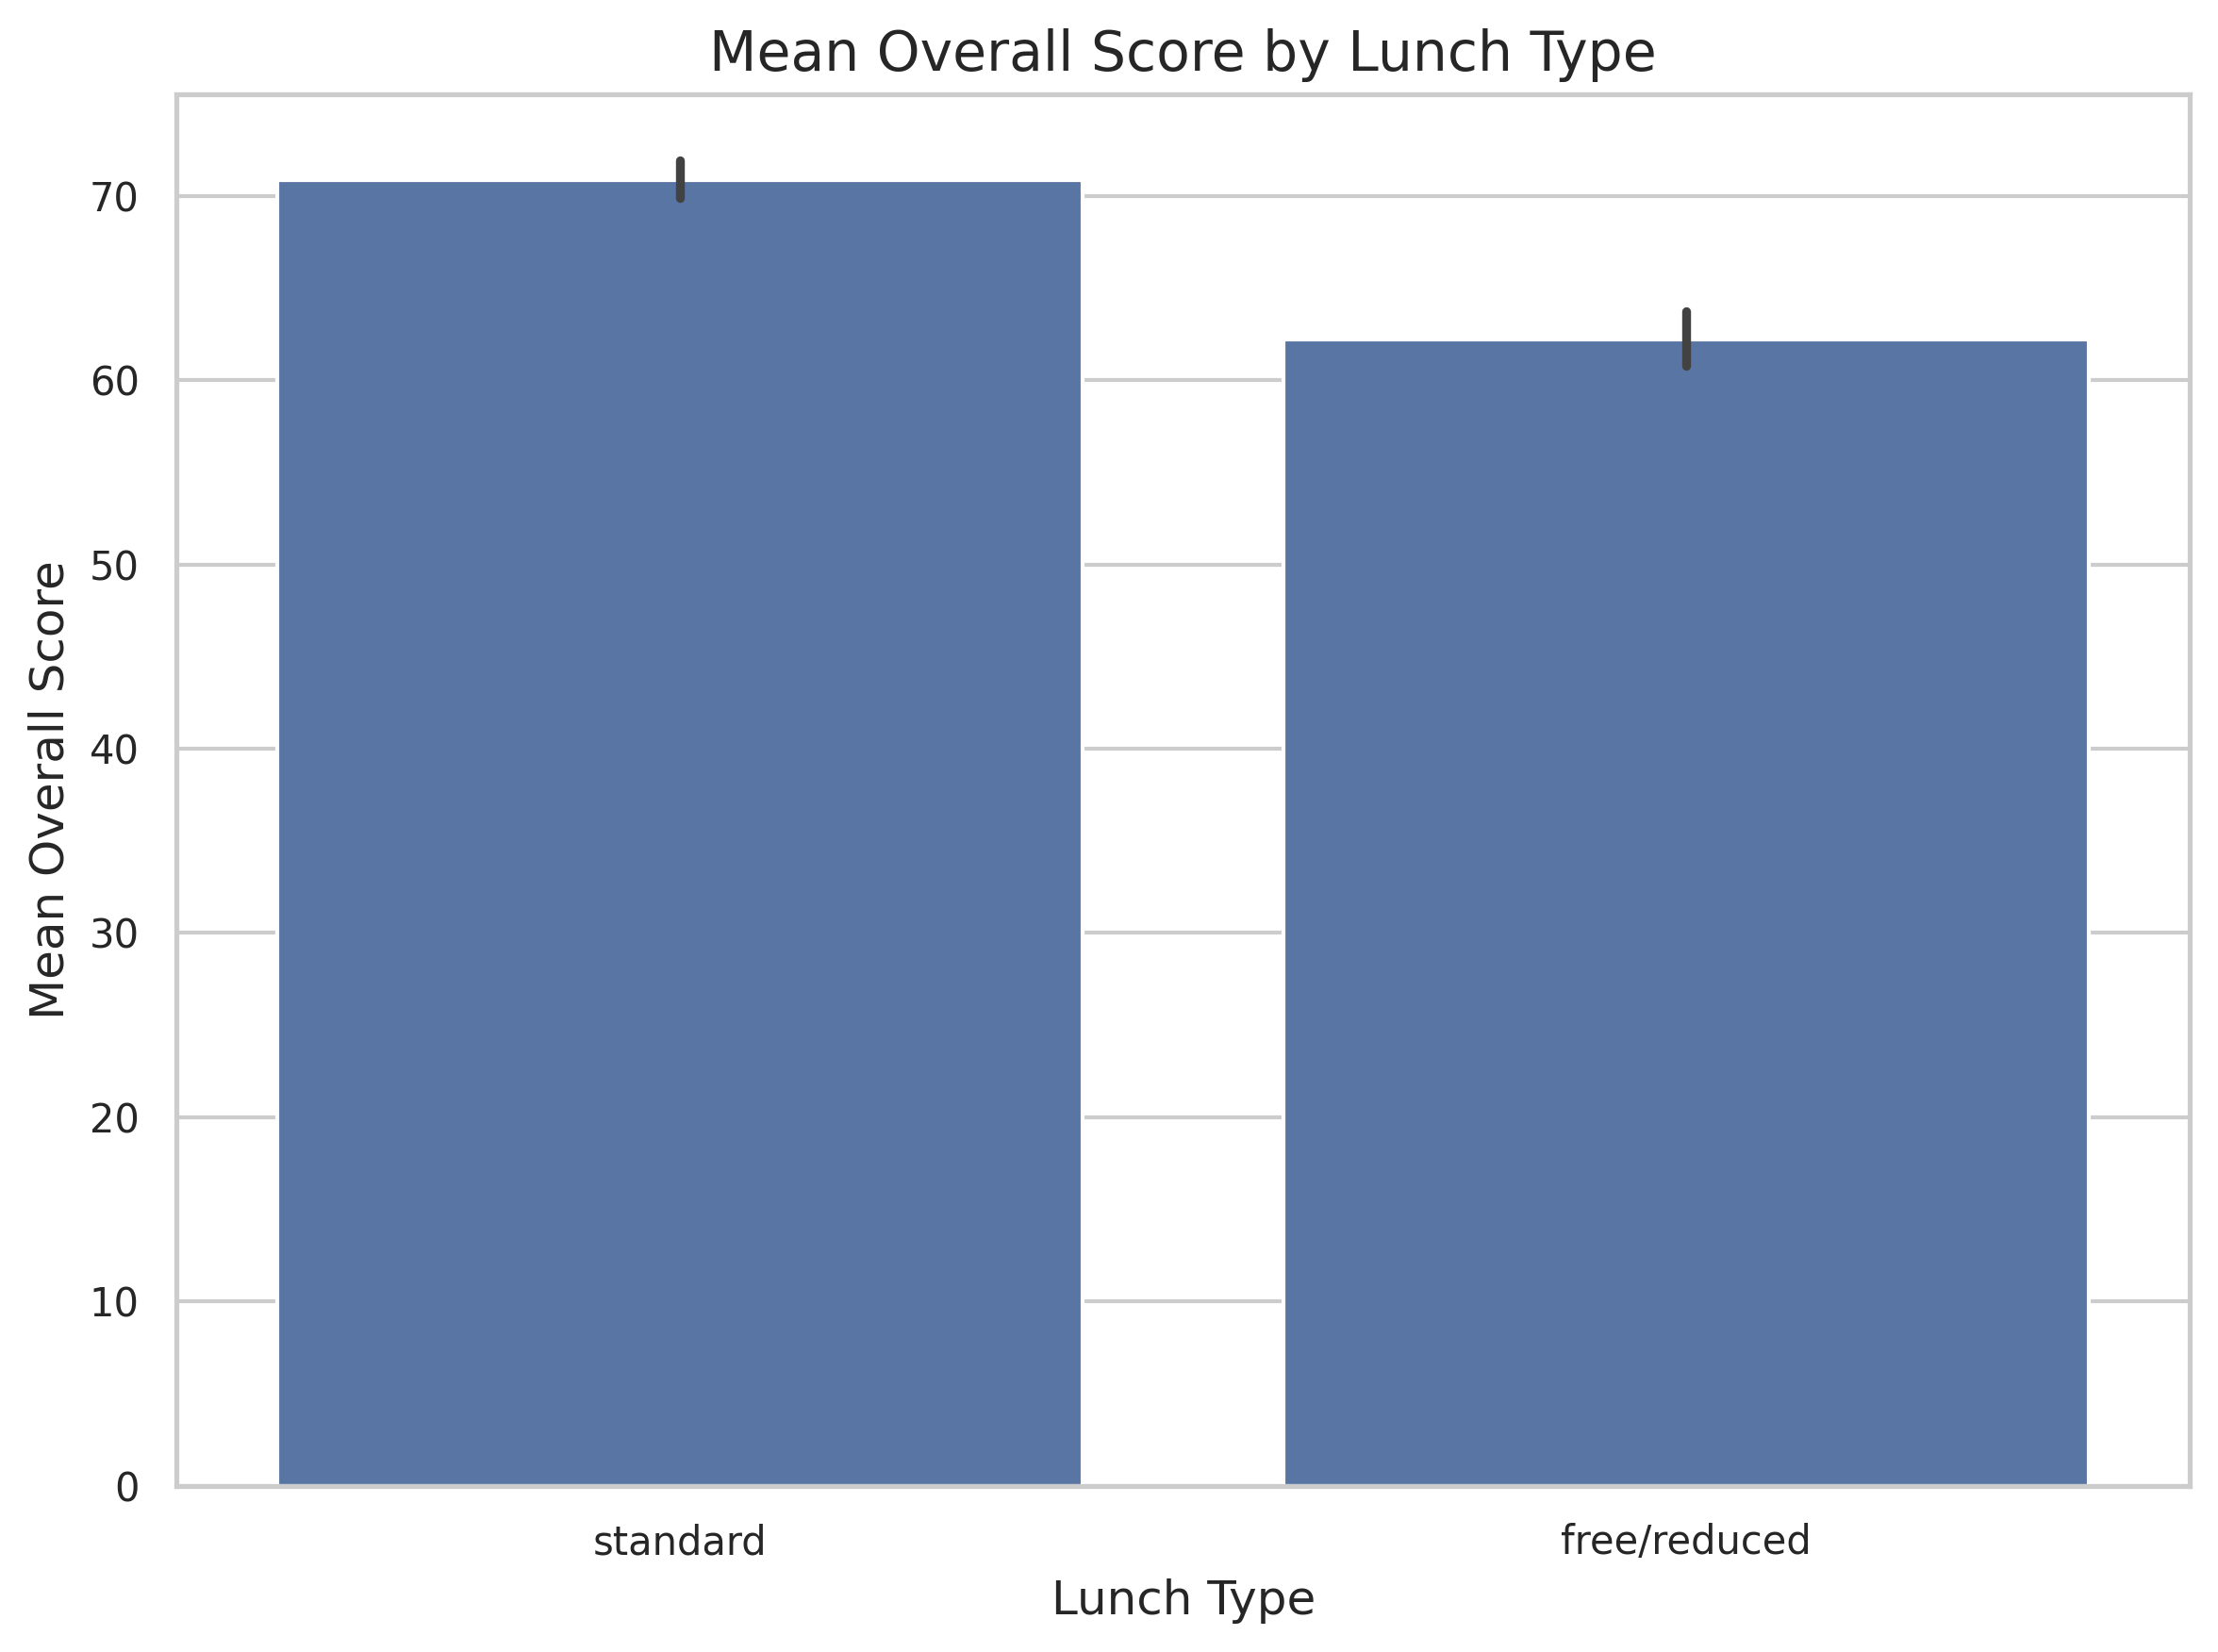

In [131]:
plt.figure(figsize=(8, 6), dpi=300)
sns.barplot(
    x=df_clean["lunch"].map({1: "standard", 0: "free/reduced"}),
    y=df_clean[["math score", "reading score", "writing score"]].mean(axis=1)
)

plt.title("Mean Overall Score by Lunch Type", fontsize=14)
plt.xlabel("Lunch Type", fontsize=12)
plt.ylabel("Mean Overall Score", fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


5–8 sentence interpretation to reports

Subject correlations

Question: How strongly do the three subjects move together?

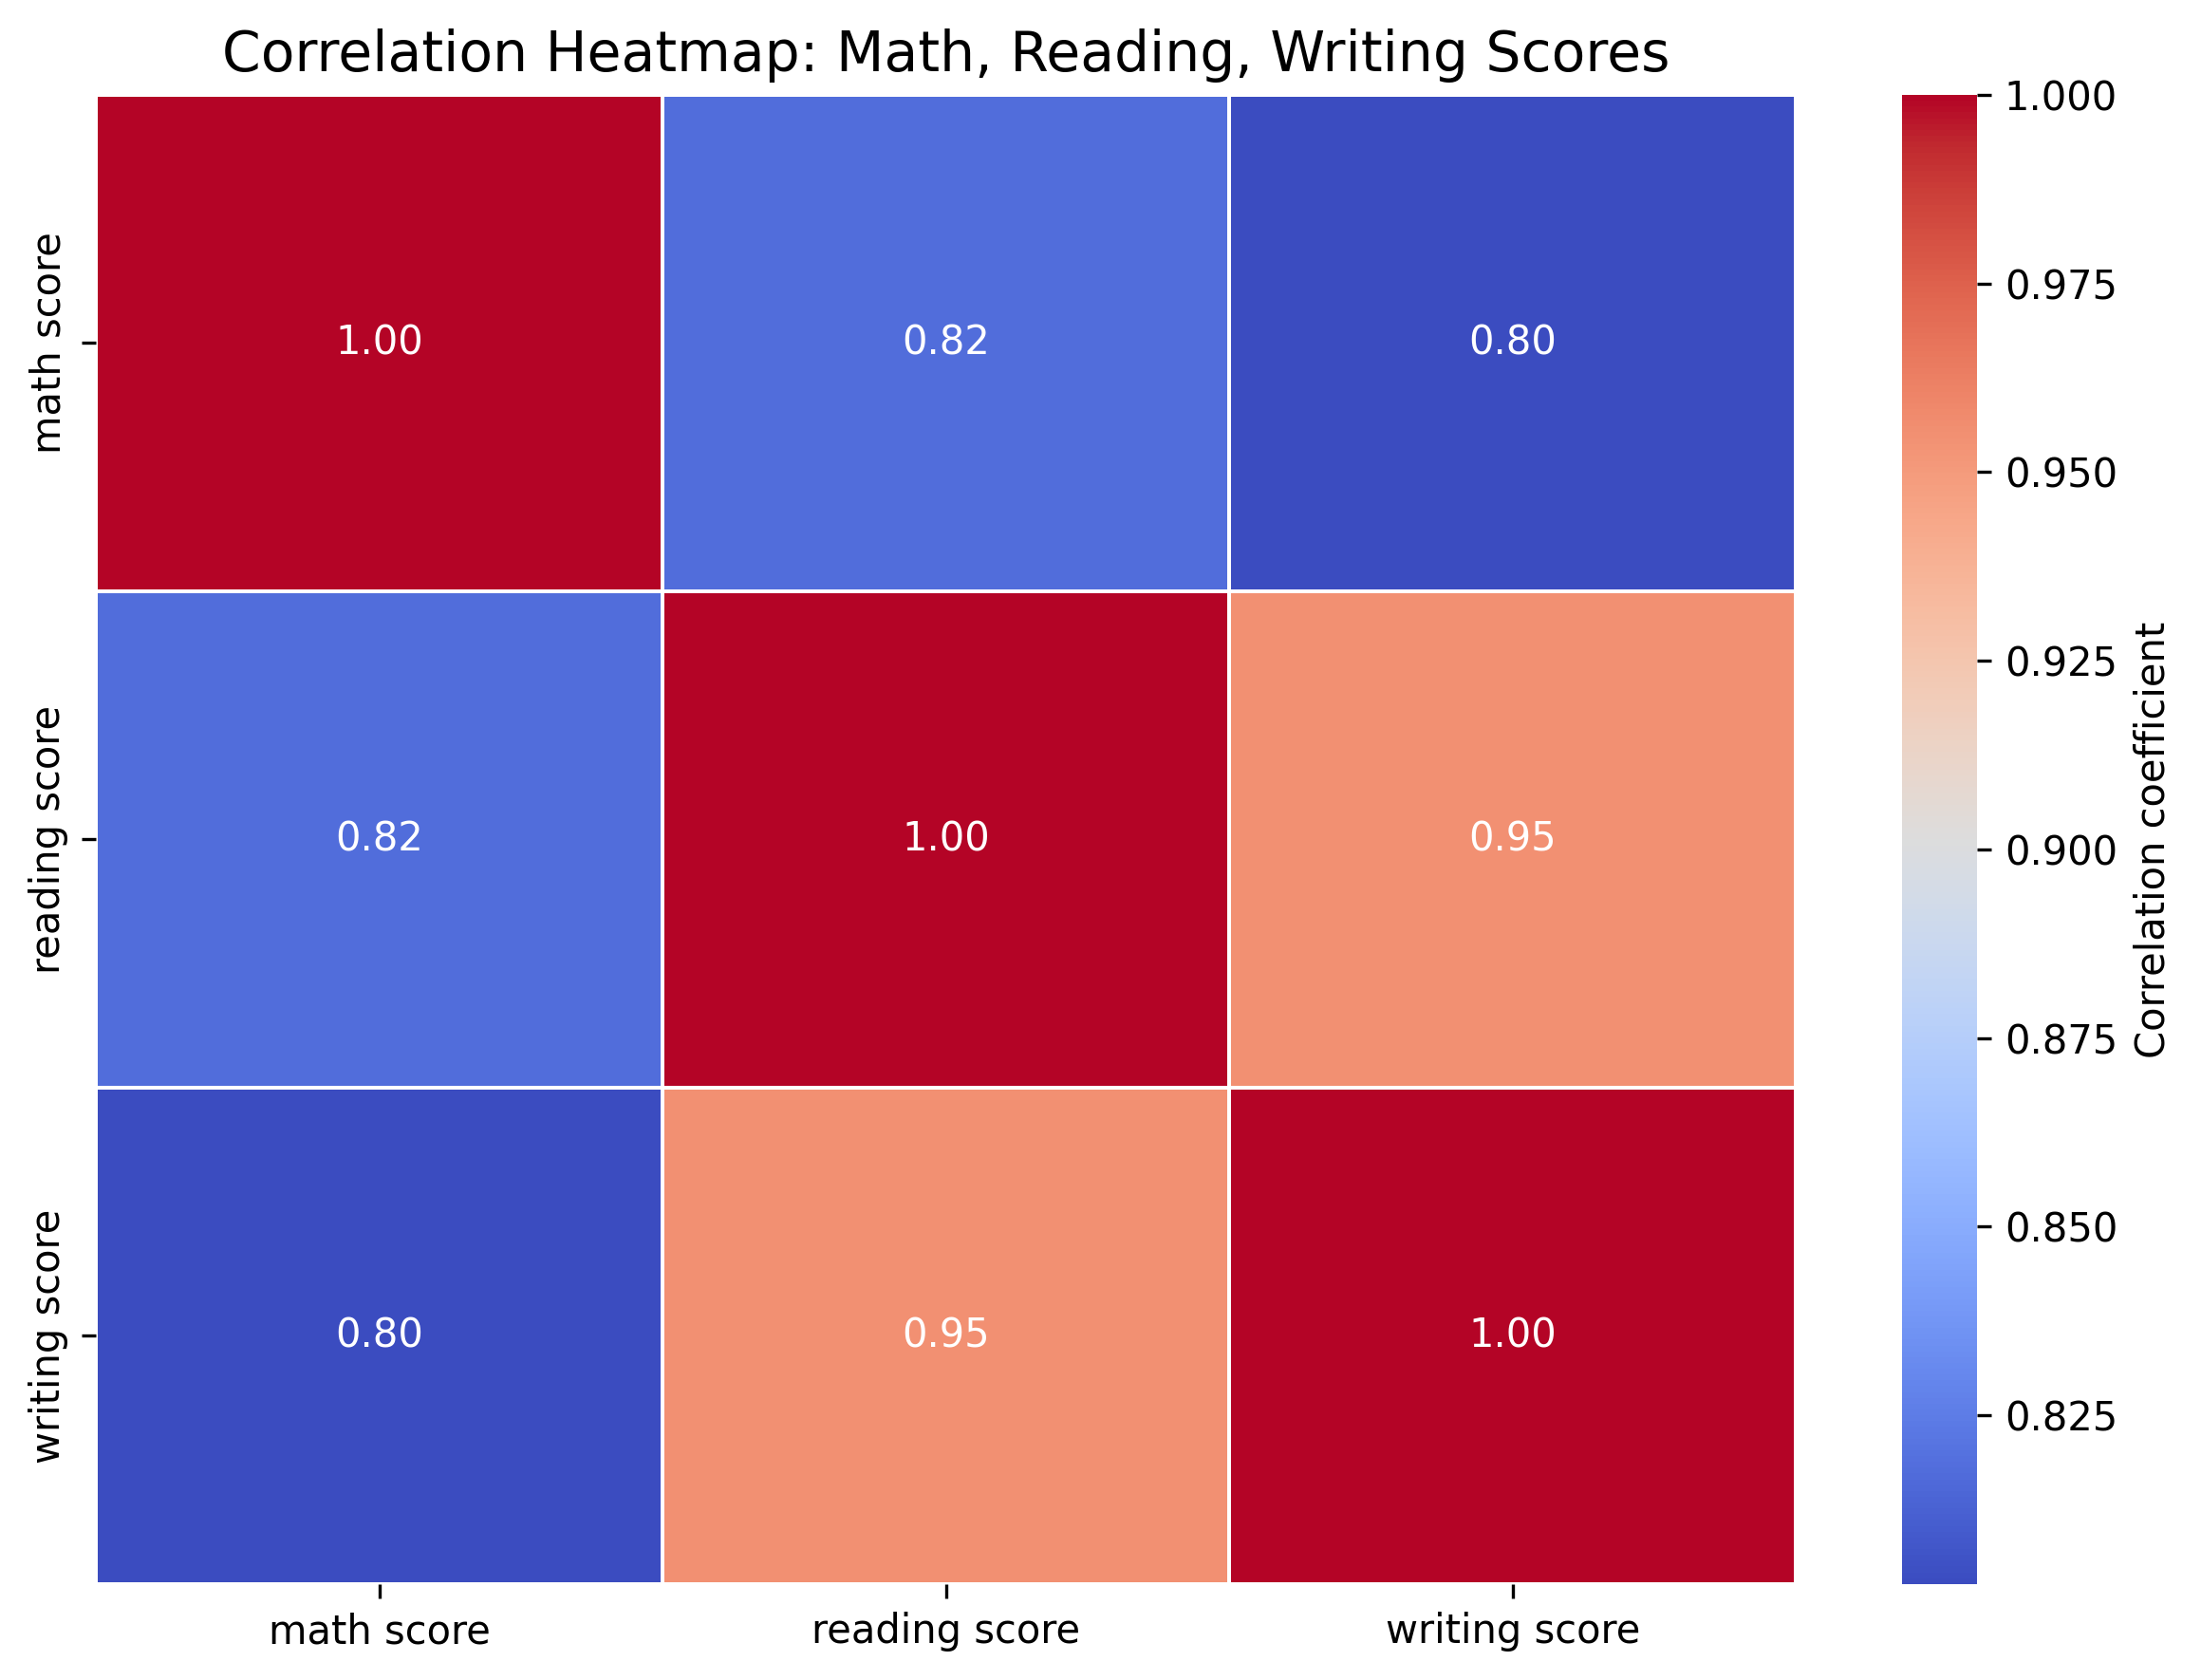

In [123]:
scores = df_clean[["math score", "reading score", "writing score"]]

corr_matrix = scores.corr()

plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"label": "Correlation coefficient"}
)

plt.title("Correlation Heatmap: Math, Reading, Writing Scores", fontsize=14)
plt.tight_layout()
plt.show()


5–8 sentence interpretation to reports

Math vs reading with trend lines by test prep

Question: How strongly are math and reading scores associated, and do students who
completed the test‑preparation course h

<Figure size 2400x1800 with 0 Axes>

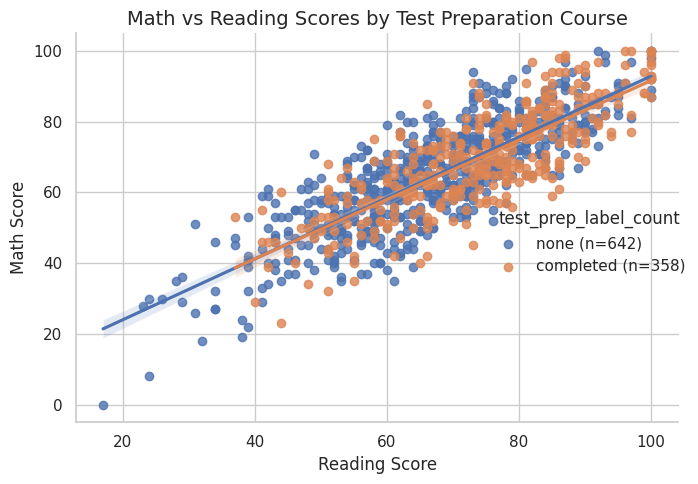

In [130]:
df_plot = df_clean.copy()
df_plot["test_prep_label"] = df_plot["test_preparation_course"].map({1: "completed", 0: "none"})

group_counts = df_plot["test_prep_label"].value_counts()
df_plot["test_prep_label_count"] = df_plot["test_prep_label"].apply(lambda x: f"{x} (n={group_counts[x]})")

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6), dpi=300)

sns.lmplot(
    x="reading score",
    y="math score",
    hue="test_prep_label_count",
    data=df_plot
)

plt.title("Math vs Reading Scores by Test Preparation Course", fontsize=14)
plt.xlabel("Reading Score", fontsize=12)
plt.ylabel("Math Score", fontsize=12)
plt.tight_layout()
plt.show()


5–8 sentence interpretation to reports